# Interactive Recommendation System with Word Embeddings using Word2Vec, Plotly, and NetworkX

## Project Breakdown
- Task 1: Introduction
- Task 2: Exploratory Data Analysis and Preprocessing
- Task 3: Word2Vec with Gensim
- Task 4: Exploring Results (you are here)
- Task 5: Building and Visualizing Interactive Network Graph

## Task 4: Exploring Results

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.word2vec import Word2Vec
import numpy as np

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#matplotlib.rcParams['figure.dpi'] = 800
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import random
random.seed(3)

In [27]:
model=Word2Vec.load('Data/w2v.model')

In [28]:
model.wv.most_similar(['orange'],topn=3)

[('tangerine', 0.8904212713241577),
 ('lemon', 0.841670572757721),
 ('clementine', 0.7768371105194092)]

In [29]:
with open('Data/items_for_sale.txt','r') as f:
    items_for_sale=f.read().split('\n')

In [30]:
items_for_sale[:3]

['salt', 'pepper', 'fresh']

In [31]:
words,vectors=[],[]
for item in items_for_sale:
    try:
        vectors.append(model.wv.get_vector(item))
        words.append(item)
    except:
        print(f'Word {item} not found in vocab -- panic!')

Word antibiotic not found in vocab -- panic!
Word parmigianino not found in vocab -- panic!


In [32]:
vectors[0]

array([-1.7122898 , -3.9950194 , -3.9773424 , -0.23776525,  0.7145234 ,
        1.5827138 ,  1.4516097 ,  1.6672037 ,  1.8544377 ,  1.9573283 ,
        3.745761  ,  1.8387344 , -0.5278118 ,  1.018562  , -5.2215433 ,
       -1.3169246 , -0.96840465, -0.10045943,  0.61501724,  1.6905187 ,
        1.5811573 , -0.12380657, -0.84756655,  0.42153612, -0.9841846 ,
       -3.0790997 , -1.7493626 , -0.12071103, -1.4112375 , -4.8033414 ,
        0.87546396,  0.45101905, -1.5238562 ,  1.1544007 ,  2.4374332 ,
        2.4217923 ,  5.0024214 , -0.7090678 , -1.668583  ,  1.2021217 ,
        2.5481632 ,  4.8999505 , -0.7171861 , -4.171837  ,  2.2016907 ,
        2.143869  , -2.9467769 ,  1.8174948 , -0.85682106,  0.90672946,
       -0.7109891 ,  1.1654792 , -2.494003  ,  0.77881163,  1.7518631 ,
        2.5377464 , -2.3086112 , -3.1239388 ,  2.1819339 , -3.3199768 ,
        0.26830816,  2.656293  , -0.42530435,  1.2881281 , -0.5543123 ,
        1.641053  , -1.4707285 ,  1.3339359 , -0.69356155,  2.21

In [33]:
sims=cosine_similarity(vectors,vectors)
#sims
sims.shape

(909, 909)

In [34]:
for i in range(len(vectors)):
    for j in range (len(vectors)):
        if i<=j:
            sims[i,j]=False
        

In [38]:
k=15
indices=list(range(len(vectors)))
random.shuffle(indices)
indices=indices[:k]
small_vectors=[vectors[i] for i in indices]
small_words=[words[i] for i in indices]
small_sims=cosine_similarity(small_vectors,small_vectors)

for x in range(len(small_vectors)):
    small_sims[x,x]=0

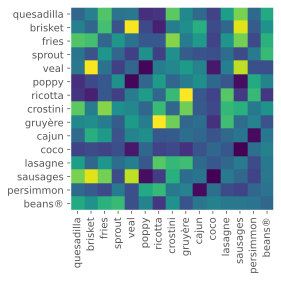

In [39]:
# adapted from https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots()
im = ax.imshow(small_sims)

ax.set_xticks(np.arange(len(small_vectors)))
ax.set_yticks(np.arange(len(small_vectors)))

ax.set_xticklabels(small_words)
ax.set_yticklabels(small_words)
ax.grid(False)

plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()

In [42]:
np.savetxt('Data/words.txt',words,fmt='%s')
np.save('Data/vectors.npy',vectors)